In [1]:
import pandas as pd

Cargar el conjunto de datos

In [2]:
titanic_data = pd.read_csv("/content/Titanic-Dataset.csv")

Mostrar las primeras filas del conjunto de datos

In [3]:
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Obtener estadísticas descriptivas

In [4]:
print(titanic_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Contar valores únicos en variables categóricas

In [5]:
print(titanic_data['Sex'].value_counts())
print(titanic_data['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Establecer estilo de los gráficos

In [7]:
sns.set(style="whitegrid")

Visualizar la distribución de la edad

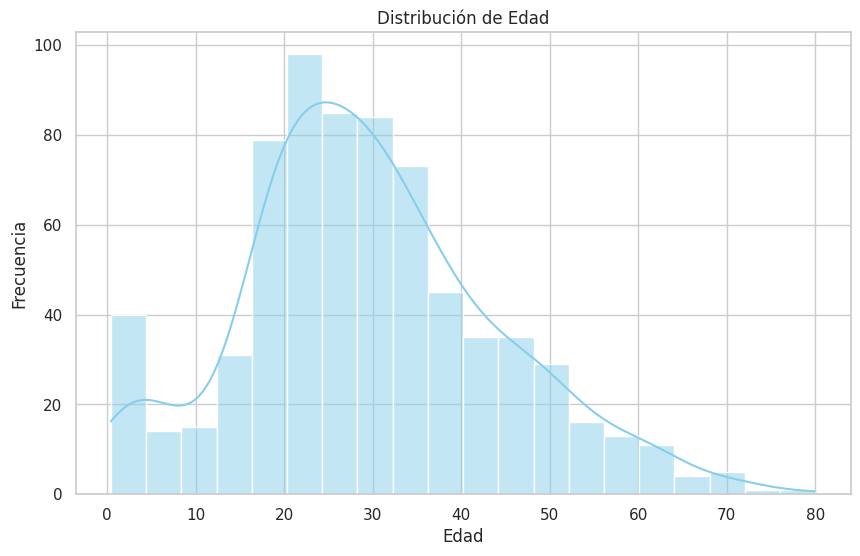

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'].dropna(), kde=True, color='skyblue')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Visualizar la distribución de la tarifa

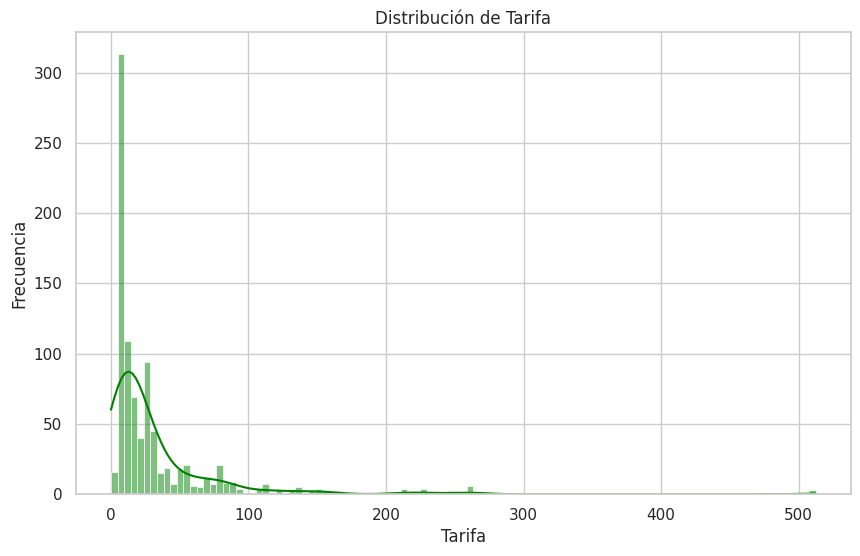

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Fare'], kde=True, color='green')
plt.title('Distribución de Tarifa')
plt.xlabel('Tarifa')
plt.ylabel('Frecuencia')
plt.show()

Visualizar la proporción de supervivencia según el sexo

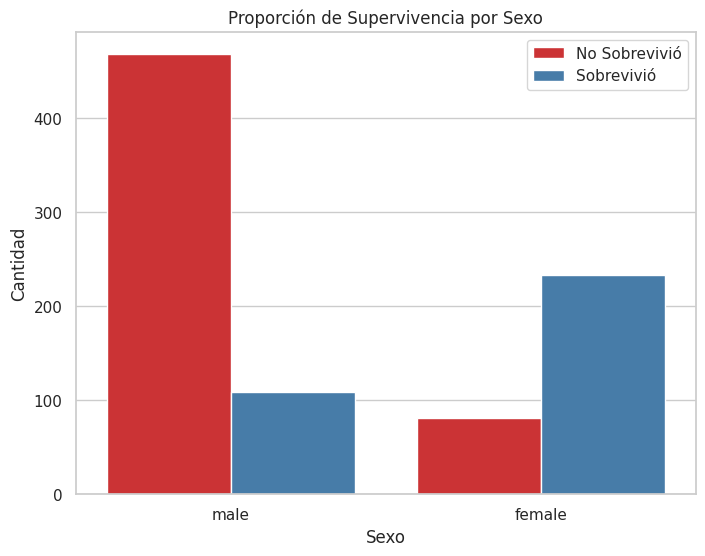

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic_data, palette='Set1')
plt.title('Proporción de Supervivencia por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.legend(['No Sobrevivió', 'Sobrevivió'])
plt.show()

Visualizar la proporción de supervivencia según la clase

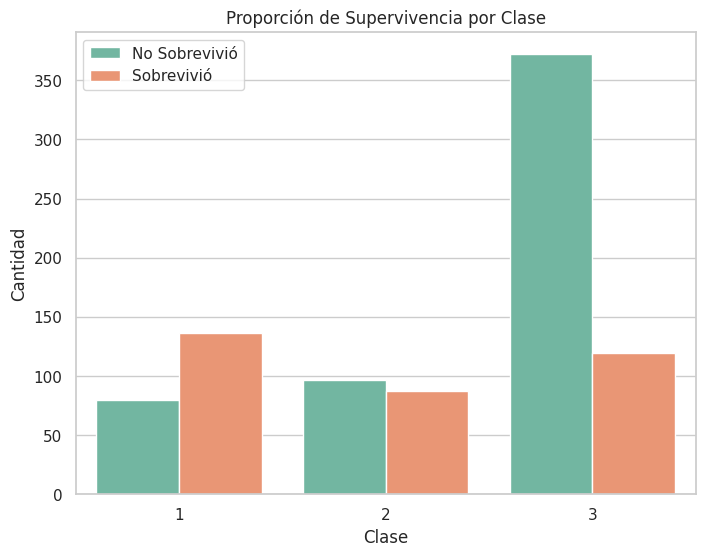

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_data, palette='Set2')
plt.title('Proporción de Supervivencia por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.legend(['No Sobrevivió', 'Sobrevivió'])
plt.show()

Visualizar la relación entre la edad y la tarifa

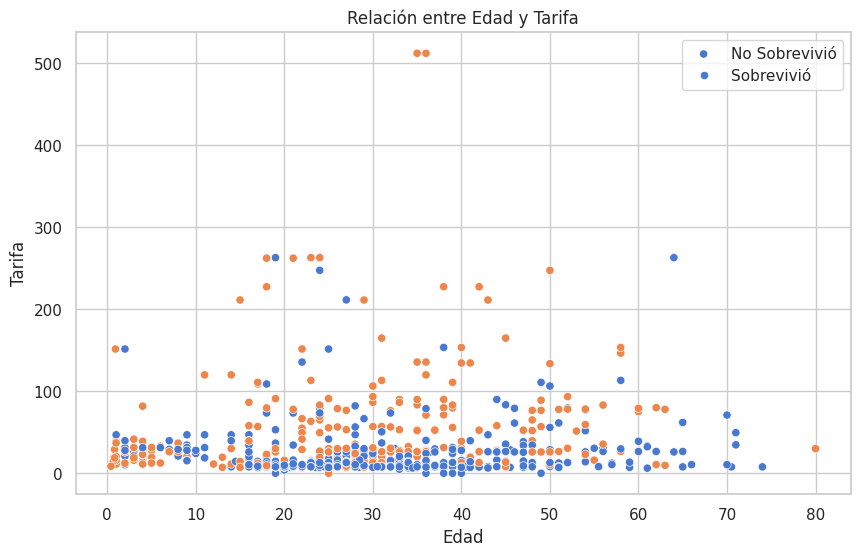

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=titanic_data, hue='Survived', palette='muted')
plt.title('Relación entre Edad y Tarifa')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.legend(['No Sobrevivió', 'Sobrevivió'])
plt.show()


Calcular la matriz de correlación

In [16]:
# Excluir columnas no deseadas
numeric_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

# Convertir variables categóricas en variables dummy
numeric_data = pd.get_dummies(numeric_data, columns=['Sex'], drop_first=True)

# Calcular la matriz de correlación
corr_matrix = numeric_data.corr()

Visualizar la matriz de correlación en un mapa de calor

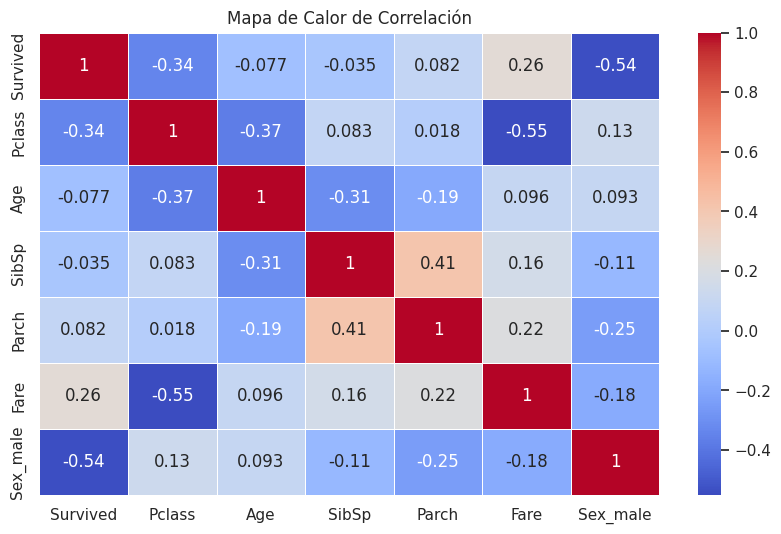

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

Calcular la mediana de la edad

In [18]:
median_age = titanic_data['Age'].median()

Reemplazar los valores faltantes en la columna 'Age' con la mediana

In [19]:
titanic_data['Age'].fillna(median_age, inplace=True)

Dividir el conjunto de datos en características y etiquetas

In [20]:
X = titanic_data.drop('Survived', axis=1)  # características
y = titanic_data['Survived']  # etiquetas

In [21]:
from sklearn.model_selection import train_test_split


Dividir el conjunto de datos en conjuntos de entrenamiento y prueba

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Verificar las formas de los conjuntos de entrenamiento y prueba

In [23]:
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (712, 11)
Forma de y_train: (712,)
Forma de X_test: (179, 11)
Forma de y_test: (179,)


In [40]:
from sklearn.linear_model import LogisticRegression

Crear instancia del clasificador de regresión logística con más iteraciones

In [43]:
logistic_clf = LogisticRegression(random_state=42, max_iter=1000)

Entrenar el modelo de regresión logística con los conjuntos de entrenamiento codificados

In [44]:
logistic_clf.fit(X_train_encoded, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Hacer predicciones en el conjunto de prueba

In [46]:
y_pred = logistic_clf.predict(X_test_encoded)

Calcular métricas de evaluación

In [47]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Imprimir métricas de evaluación

In [48]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8044692737430168
Precision: 0.7746478873239436
Recall: 0.7432432432432432
F1-score: 0.7586206896551724


In [49]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

Matriz de confusión

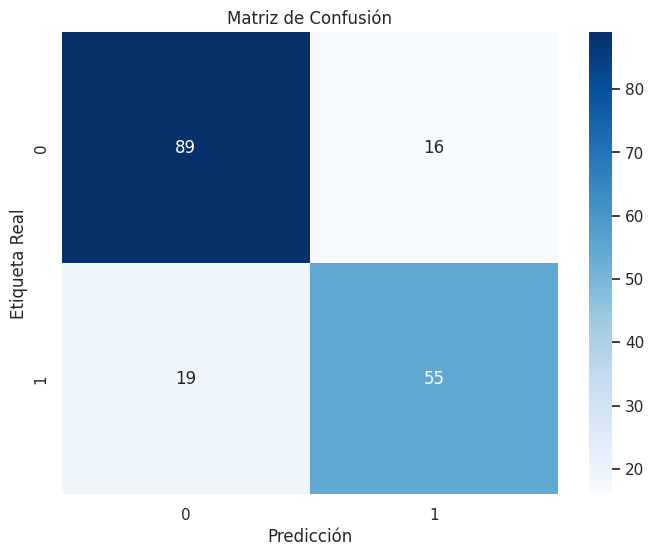

In [50]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.show()

Curva ROC

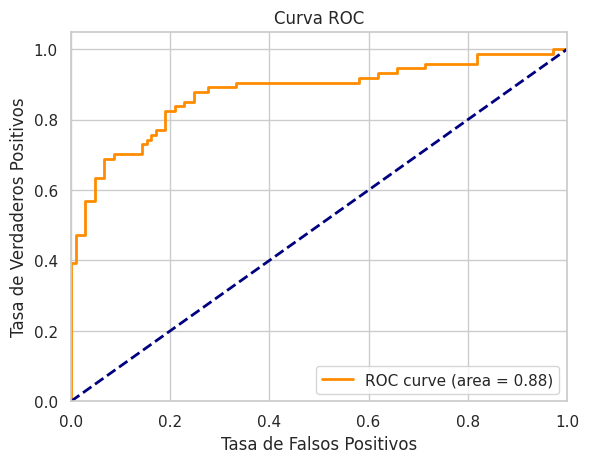

In [51]:
y_pred_proba = logistic_clf.predict_proba(X_test_encoded)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Curva Precision-Recall

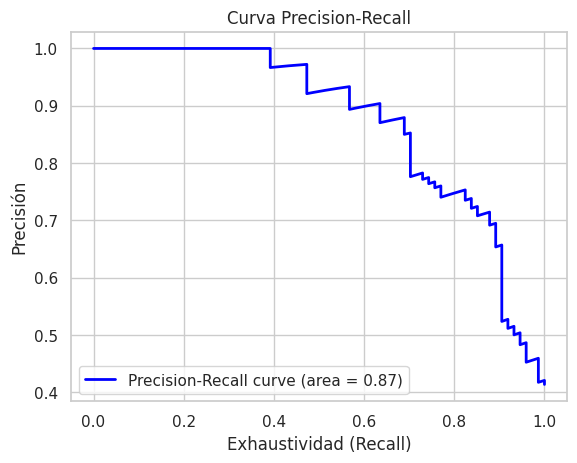

In [52]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Exhaustividad (Recall)')
plt.ylabel('Precisión')
plt.title('Curva Precision-Recall')
plt.legend(loc="lower left")
plt.show()